<a href="https://colab.research.google.com/github/mohan-mj/Random-Forest-Classification/blob/master/Random%20Forest%20Classification-Transfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mohan-mj/Random-Forest-Classification/master/transfusion.csv')
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


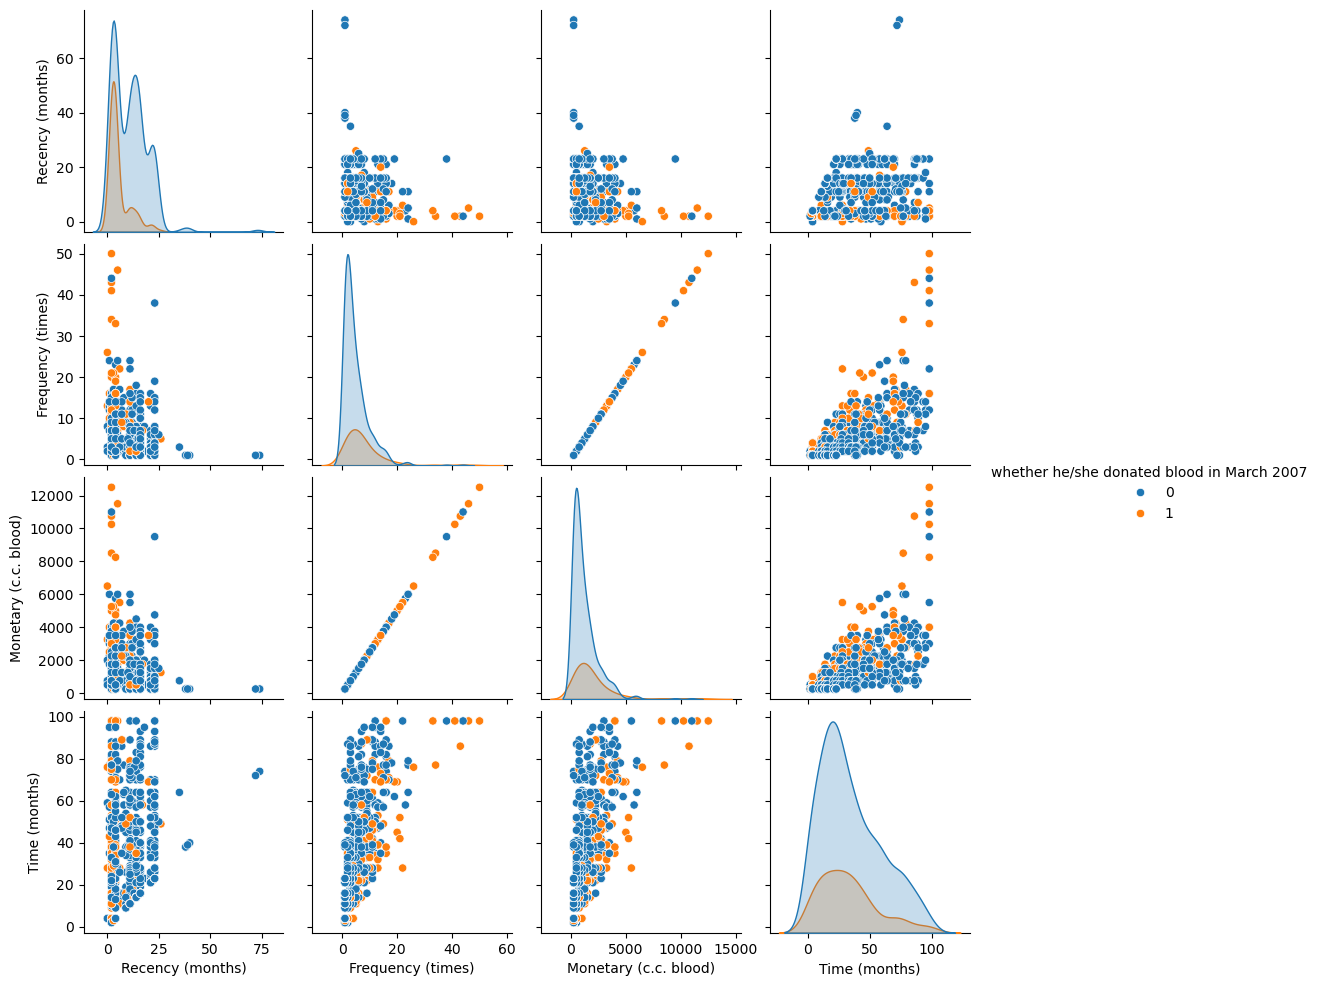

In [5]:
sns.pairplot(dataset, hue = "whether he/she donated blood in March 2007")

In [6]:
# split the data into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
# shape of X
X.shape

(748, 4)

In [8]:
# shape of y
y.shape

(748,)

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 40)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=40)

In [12]:
# Predict
y_pred = classifier.predict(X_train)

<Axes: >

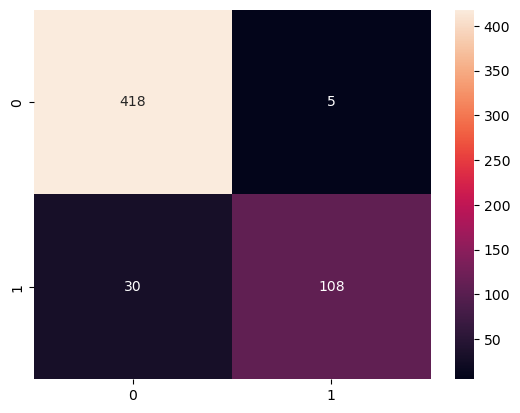

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [14]:
# (cm.diagonal().sum()/cm.sum())*100
classifier.score(X_train,y_train)*100

93.76114081996435

In [15]:
classifier.score(X_test,y_test)*100

77.54010695187165

In [16]:
cm1 = confusion_matrix(y_test, classifier.predict(X_test))
cm1

array([[131,  16],
       [ 26,  14]])

In [17]:
(cm1.diagonal().sum()/cm1.sum())*100

77.54010695187165